# Hotel Cancellation

**Dataset source** : [Kaggle link](https://www.kaggle.com/datasets/mojtaba142/hotel-booking)

#### Problem Statement 
In recent years, City Hotel and Resort Hotel  have seen high cancellation rates. Each hotel 
is now dealing with a number of issues as a result, including fewer revenues and less than 
ideal hotel room  use. Consequently, lowering cancellation  rates is both  hotels’ primary 
goal in order to increase their efficiency in generating revenue,  ad for us to offer thorough 
business advice to address this problem. 
The analysis of hotel booking cancellations as well as other factors that have no bearing on 
their  business and  yearly revenue generation are the main topics of this report.

##### Assumptions
1.	Data Completeness: The dataset is complete with no significant missing values that could skew the analysis.
2.	Consistency of Cancellations: Cancellations are recorded consistently across both hotels, allowing for valid comparisons.
3.	External Factors: External factors (e.g., economic conditions, local events) influencing cancellation rates are either controlled for or noted separately.
4.	Guest Behavior: Guests’ booking behaviors and preferences are stable over time and can be used to predict future trends.
5.	Market Dynamics: The market segments and distribution channels are representative of the current booking landscape.


##### Related Questions to Answer
1.	What are the overall cancellation rates for each hotel, and how do they compare?
2.	Which demographic factors (e.g., country, number of guests) correlate most strongly with cancellation rates?
3.	How does the lead time affect the likelihood of cancellation?
4.	Are there particular market segments or distribution channels associated with higher cancellation rates?
5.	What role do room types and stay patterns play in influencing cancellations?
6.	How do special requests and deposit types impact cancellation likelihood?
7.	What patterns exist between previous booking behaviors (cancellations and non-cancellations) and current cancellations?
8.	Can we identify any time-based trends in cancellation rates, and how can this inform future predictions?


#### Import lybraries and load the dataset

In [7]:
## lybraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
##load the dataset
df = pd.read_csv("hotel_booking_kaggle_dataset.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


##### Basic information about dataset

In [10]:
#for showing 36 columns
pd.set_option("display.max_columns",36) 

In [11]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [12]:
df.shape

(119390, 36)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Check

Row Check

In [16]:
df.duplicated().sum()

0

Column Check

In [18]:
def duplicate_cols(data):
    dup_cols = set()
    for x in range(data.shape[1]):
        base_col = data.iloc[:,x]
        for y in range(x+1,data.shape[1]):
            comp_col = data.iloc[:,y]
            if base_col.equals(comp_col):
                dup_cols.add(data.columns.values[y])
    return dup_cols
duplicate_cols(df)

set()

**Insights**
* There is no duplicate in the dataset

#### Feature Engineering

Drop the columns 'name', 'email', 'phone-number', 'credit_card'

In [22]:
df.drop(['name','email','phone-number','credit_card'],axis=1,inplace=True)

Change the data-type of reservation_status_date

In [24]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%Y-%m-%d', errors='coerce')

In [25]:
df['reservation_status_date'].dtype

dtype('<M8[ns]')

Format change into day-month-year

In [27]:
df['reservation_status_date'] = df['reservation_status_date'].dt.strftime('%d-%m-%Y')

Rename adr to Average Daily Rate

In [29]:
df = df.rename(columns={'adr': 'average_daily_rate'})

### Exploratory Data Analysis

#### Duplicates Finding

Row checking

In [33]:
df.duplicated().sum()

31994

Column checking

In [35]:
def duplicate_cols(data):
    dup_cols = set()
    for x in range(data.shape[1]):
        base_col = data.iloc[:,x]
        for y in range(x+1,data.shape[1]):
            comp_col = data.iloc[:,y]
            if base_col.equals(comp_col):
                dup_cols.add(data.columns.values[y])
    return dup_cols
duplicate_cols(df)

set()

**Insights**
* After removing personal details of the customers it is showing that there are 31994 duplicate values, which is a concerning things, it indicates that there are some misinformation in the dataset. That huge number of data couldn't be same by a coincidence

##### Droping Duplicates

In [38]:
df.drop_duplicates(inplace=True)

In [39]:
df.shape

(87396, 32)

#### Numerical Columns Analysis

##### Statistical analysis

In [42]:
columns_to_analyze = ['is_canceled','lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','average_daily_rate']

In [43]:
df[columns_to_analyze].describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,average_daily_rate
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,0.749565,106.337246
std,0.446466,86.052325,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,10.015731,55.013953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,0.000000,11.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000
50%,0.000000,49.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.100000
75%,1.000000,125.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000
max,1.000000,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000


##### Outliers

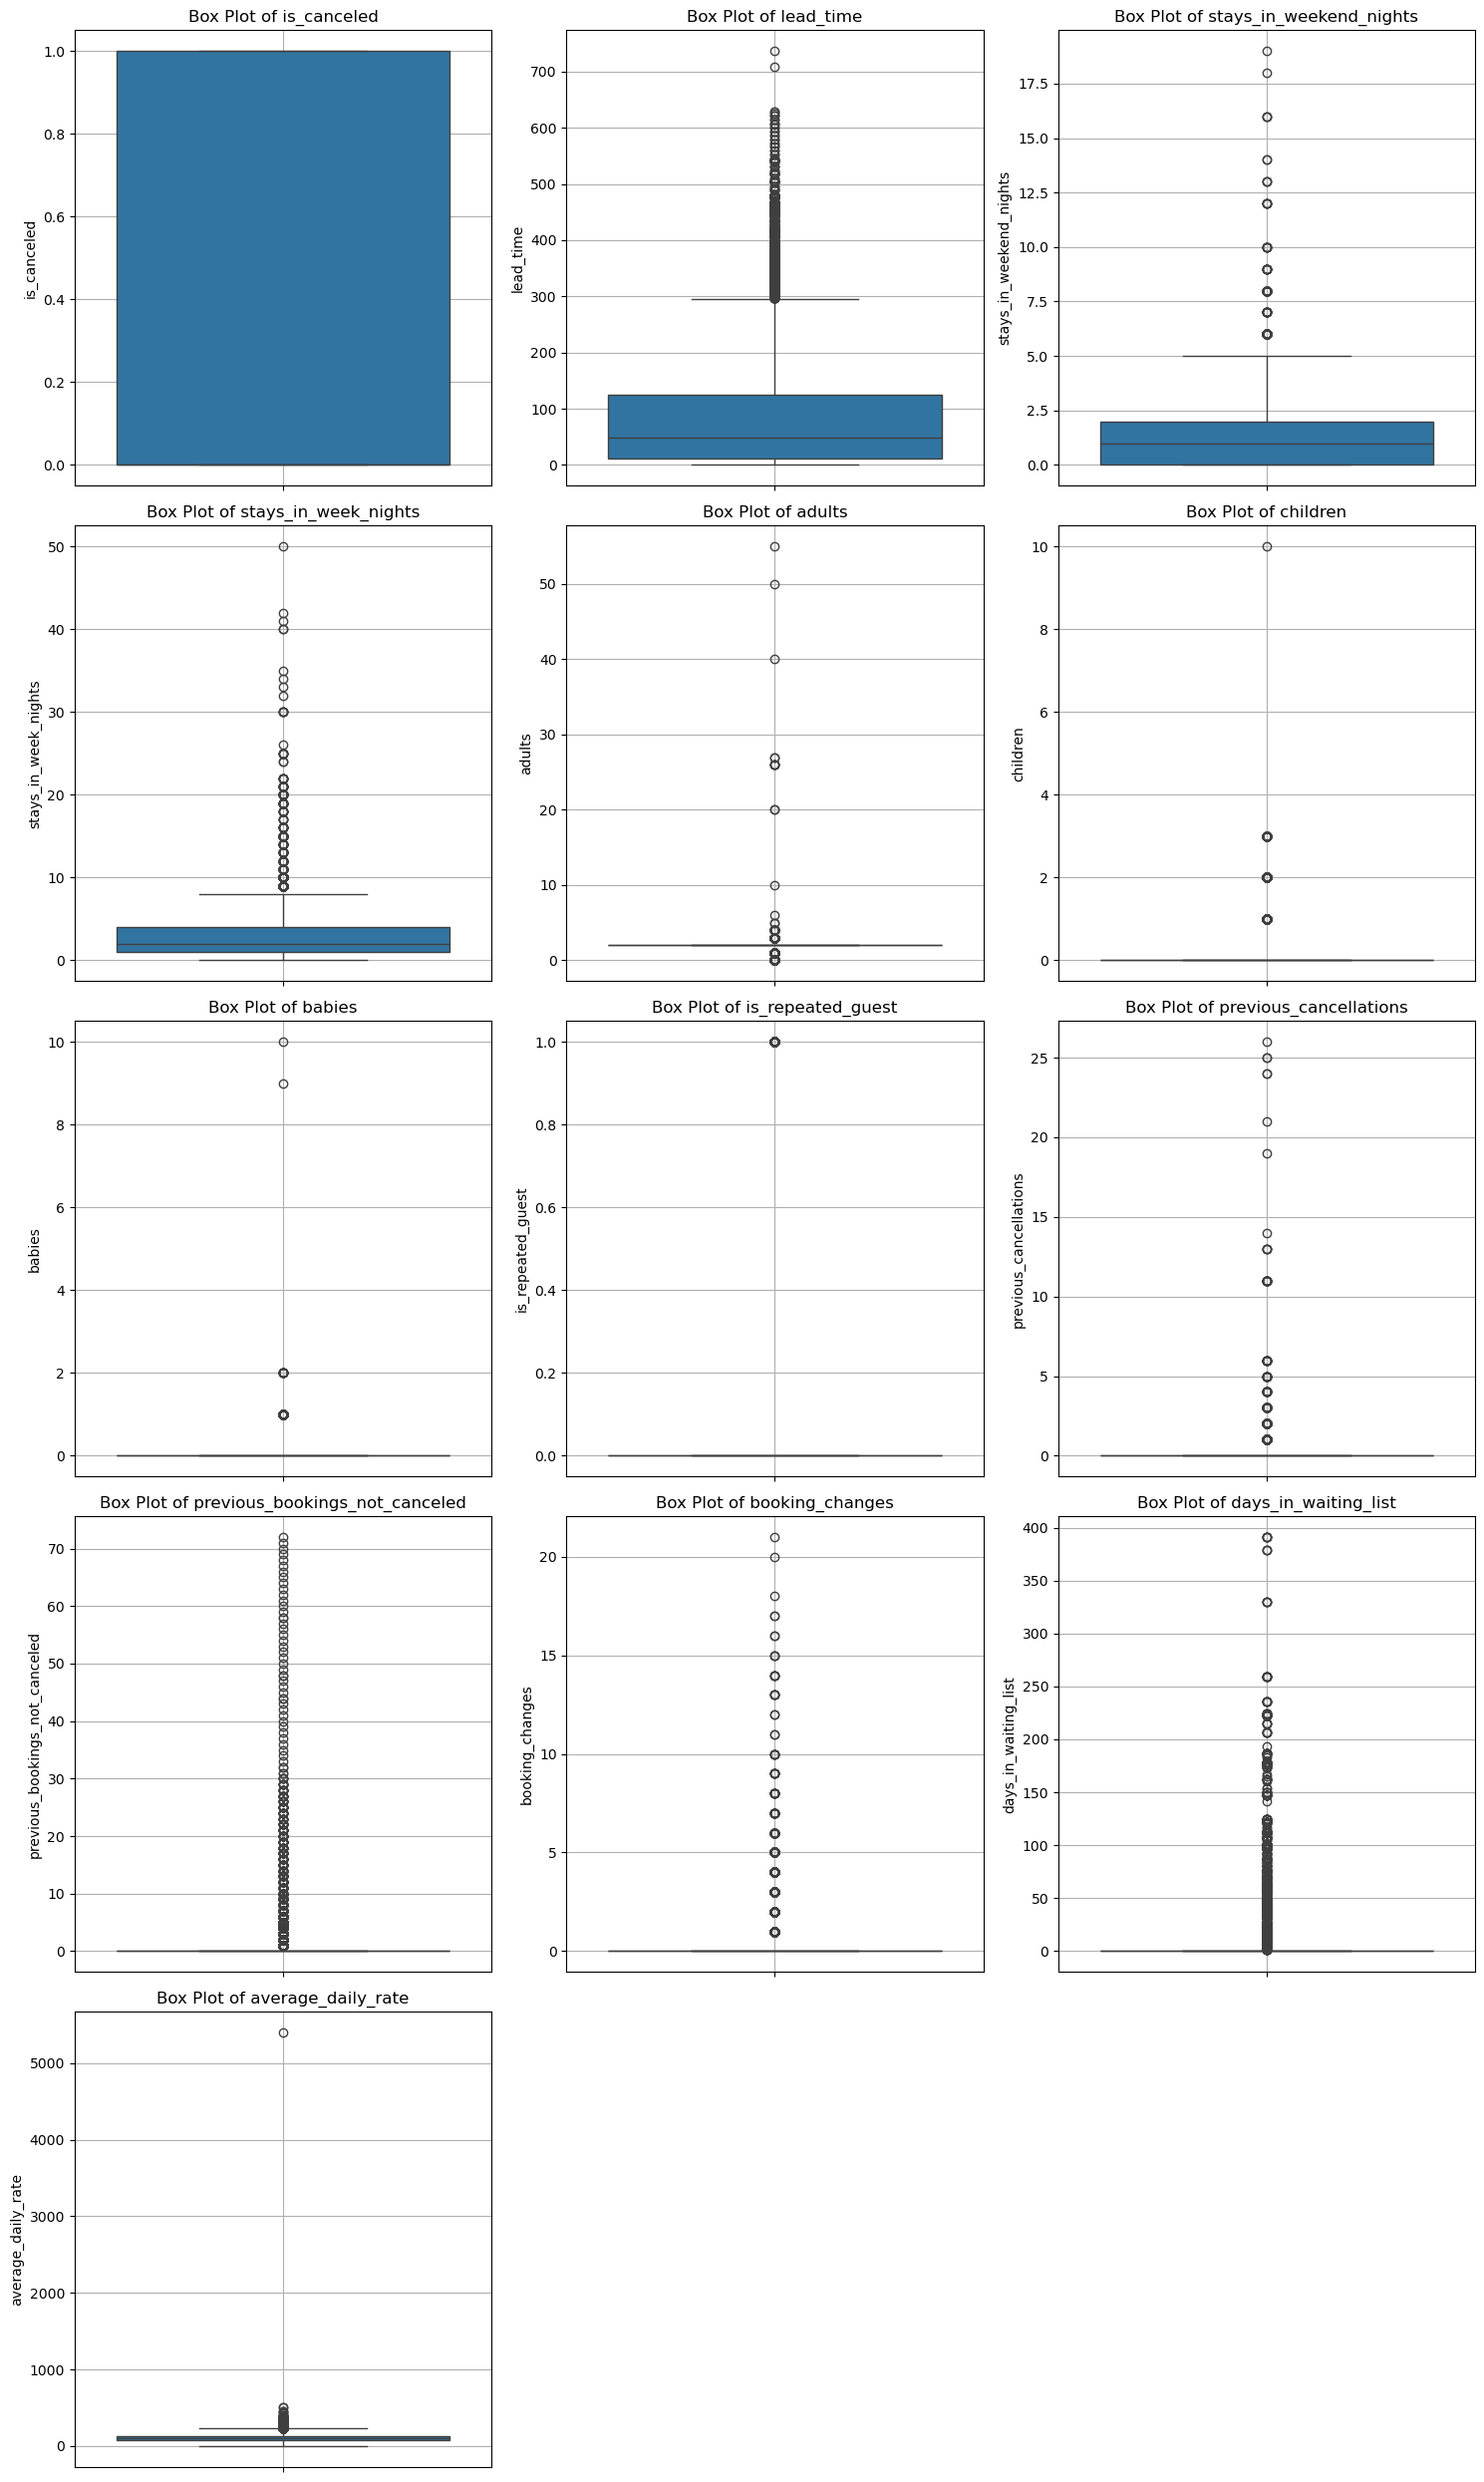

In [45]:
# Number of subplots
num_columns = 3
num_rows = (len(columns_to_analyze) + num_columns - 1) // num_columns  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Create box plots
for i, column in enumerate(columns_to_analyze):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].grid()

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Insights**
* Data is full of outliers

In [47]:
# Function to remove outliers based on IQR
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter the DataFrame to remove outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

# Remove outliers from specified columns
cleaned_df = remove_outliers_iqr(df, columns_to_analyze)


In [48]:
cleaned_df.shape

(42552, 32)

In [49]:
outliers_df = df[~df.apply(tuple, axis=1).isin(cleaned_df.apply(tuple, axis=1))]

In [50]:
outliers_df.shape

(44844, 32)

* We separate the dataset into two dataset where one in without outliers (cleaned_df) and another one consists all the outlier data (outliers_df)

### Cleaned Dataset Analysis

#### Checking Missing Value

In [54]:
cleaned_df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                              59
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              3182
company                           42044


In [55]:
cleaned_df['company'].value_counts()

company
223.0    56
110.0    29
405.0    26
498.0    21
174.0    21
         ..
291.0     1
491.0     1
28.0      1
484.0     1
492.0     1
Name: count, Length: 145, dtype: int64

In [56]:
cleaned_df.shape

(42552, 32)

In [57]:
cleaned_df['company'].value_counts().nlargest(25)

company
223.0    56
110.0    29
405.0    26
498.0    21
174.0    21
40.0     17
280.0    14
251.0    13
45.0     12
38.0      9
78.0      8
68.0      8
342.0     8
81.0      7
47.0      7
178.0     7
268.0     7
465.0     7
9.0       7
233.0     7
242.0     6
195.0     6
263.0     6
143.0     6
308.0     5
Name: count, dtype: int64

* Among 42552 rows, 42044 rows are missing in 'company' column, so we are droping this column
* 59 rows are missing in 'country' column, which is a small number compared to the dataset, so we are droping those missing values

In [59]:
## company column drop
cleaned_df.drop(['company'],axis=1,inplace=True)

In [60]:
## country missing rows drop
cleaned_df.dropna(subset=['country'],inplace=True)

In [61]:
cleaned_df['agent'].value_counts()

agent
9.0      16572
240.0     6892
7.0       1956
14.0      1518
28.0      1173
         ...  
430.0        1
420.0        1
431.0        1
270.0        1
449.0        1
Name: count, Length: 234, dtype: int64

* we are not concerning about 'agent' column, we are keeping it with missing values

In [63]:
cleaned_df.isnull().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              0
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                             3156
days_in_waiting_list                 0
customer_type            

#### Exploratory Data Analysis of Cleaned Data

In [65]:
print("Percentage of hotel type")
print(cleaned_df['hotel'].value_counts(normalize=True)*100)

Percentage of hotel type
hotel
City Hotel      64.198809
Resort Hotel    35.801191
Name: proportion, dtype: float64


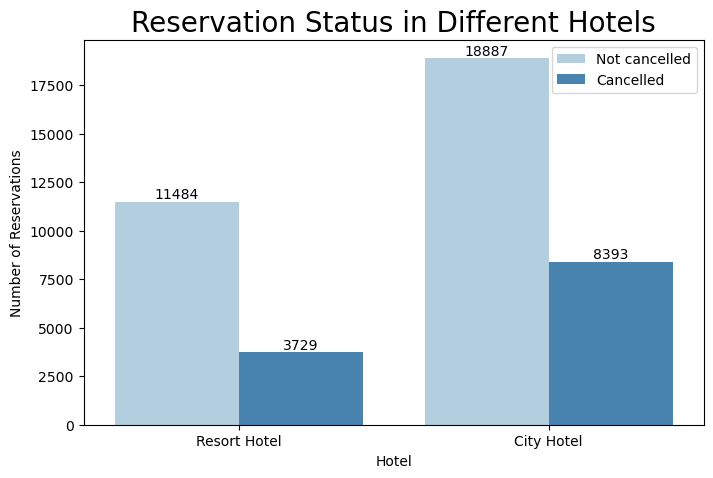

In [66]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='hotel',data=cleaned_df,hue='is_canceled',palette='Blues')
legend_labels,_ = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1,1))
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Reservation Status in Different Hotels", size=20)
plt.xlabel("Hotel")
plt.ylabel("Number of Reservations")
plt.legend(['Not cancelled','Cancelled'])
#plt.savefig('E:/Tuaha/data_analysis_projects/python/TechClasses/Hotel_Booking_Cancellation/images/Reservation Status in Different Hotels.png')
plt.show()

In [67]:
resort_hotel = cleaned_df[cleaned_df['hotel']=='Resort Hotel']
print("Resort hotel cancelled and not cancelled percentage")
print(resort_hotel['is_canceled'].value_counts(normalize=True)*100)
print('------------------------------------------------------------------')
print("City hotel cancelled and not cancelled percentage")
city_hotel = cleaned_df[cleaned_df['hotel']=='City Hotel']
print(city_hotel['is_canceled'].value_counts(normalize=True)*100)

Resort hotel cancelled and not cancelled percentage
is_canceled
0    75.488069
1    24.511931
Name: proportion, dtype: float64
------------------------------------------------------------------
City hotel cancelled and not cancelled percentage
is_canceled
0    69.233871
1    30.766129
Name: proportion, dtype: float64


* 0 means not cancelled and 1 means cancelled, we can see cancellation percentage is higher in City Hotel, though their booking is higher

##### Customer type analysis

In [70]:
resort_hotel['customer_type'].value_counts()

customer_type
Transient          12841
Transient-Party     1551
Contract             751
Group                 70
Name: count, dtype: int64

In [71]:
city_hotel['customer_type'].value_counts()

customer_type
Transient          24074
Transient-Party     2240
Contract             862
Group                104
Name: count, dtype: int64

**Breakdown of what the data might indicate:**

**Summary of the Data**
* Transient : This is the largest segment, indicating that most bookings are made by individual travelers. This group may include business travelers or tourists who prefer short stays. It suggests a reliance on individual bookings and potentially high occupancy during certain times.

* Transient-Party : This category consists of groups of transient guests (e.g., friends or families traveling together). While smaller than the transient segment, it still represents a significant number of bookings, indicating that some guests prefer to travel in small groups.

* Contract : This category typically includes guests with negotiated rates, such as business clients or organizations. The number is relatively low compared to transient bookings, which could suggest that the hotel is not heavily reliant on long-term contracts.

* Group : This segment is the smallest, likely representing larger groups such as conferences or events. The low number might indicate limited capacity for large groups or a focus on smaller events.

**Insights and Implications**
* Market Focus: The data suggests that the hotel primarily serves individual travelers, indicating a need to cater to this market segment with tailored services (e.g., special offers for solo travelers).

* Seasonal Strategies: The hotel might consider marketing strategies aimed at transient guests during peak seasons or local events to maximize occupancy.

* Group Business Potential: The low number of group bookings might indicate an opportunity to develop packages or partnerships with organizations for events, which could increase this segment.

* Diversification: Relying heavily on transient guests may pose risks during economic downturns. The hotel could explore strategies to attract more contract or group bookings to diversify its customer base.

* Pricing Strategy: Understanding the distribution of customer types can help refine pricing strategies, particularly for transient and contract guests, potentially offering discounts or loyalty programs.

**Conclusion**  
Overall, the data reflects a strong base of individual travelers with opportunities to enhance group and contract business. Strategic adjustments to marketing and pricing can help the hotel maximize its potential across different customer types.

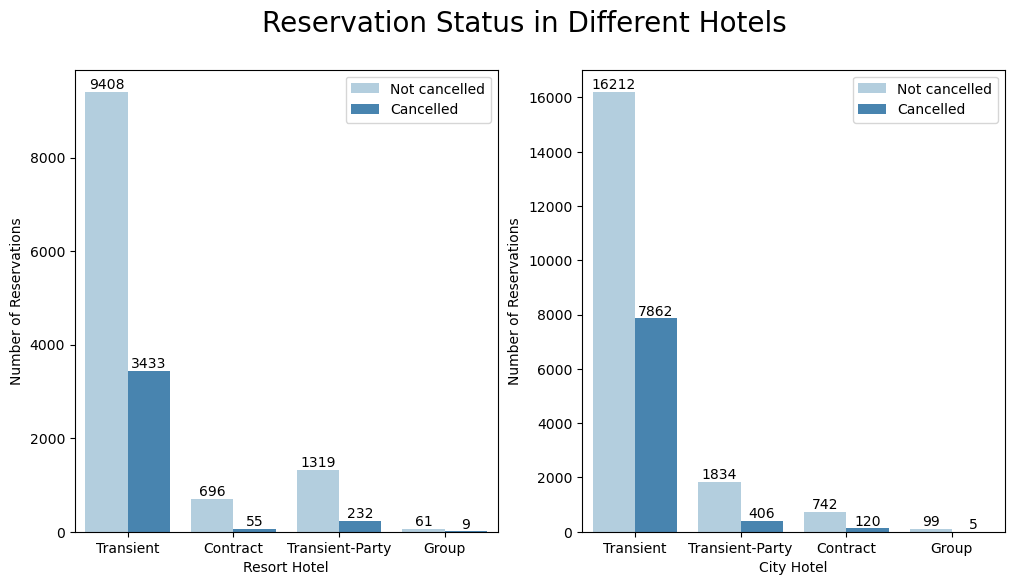

In [73]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
ax1 =sns.countplot(x='customer_type',data=resort_hotel,hue='is_canceled',palette='Blues')
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
ax1.set_xlabel("Resort Hotel")
ax1.set_ylabel("Number of Reservations")
plt.legend(['Not cancelled','Cancelled'])

plt.subplot(1,2,2)
ax2 = sns.countplot(x='customer_type',data=city_hotel,hue='is_canceled',palette='Blues')
legend_labels,_ = ax2.get_legend_handles_labels()
ax2.legend(bbox_to_anchor=(1,1))
ax2.bar_label(ax2.containers[0])
ax2.bar_label(ax2.containers[1])
ax2.set_xlabel("City Hotel")
ax2.set_ylabel("Number of Reservations")
plt.legend(['Not cancelled','Cancelled'])

plt.suptitle("Reservation Status in Different Hotels", size=20)
#plt.savefig('E:/Tuaha/data_analysis_projects/python/TechClasses/Hotel_Booking_Cancellation/images/Reservation Status in Different Hotels.png')
plt.show()

In [74]:
resort_hotel = cleaned_df[cleaned_df['hotel']=='Resort Hotel']
print("Resort hotel cancelled and not cancelled percentage")
print(resort_hotel['is_canceled'].value_counts(normalize=True)*100)
print('------------------------------------------------------------------')
print("City hotel cancelled and not cancelled percentage")
city_hotel = cleaned_df[cleaned_df['hotel']=='City Hotel']
print(city_hotel['is_canceled'].value_counts(normalize=True)*100)

(15213, 31)

In [114]:
resort_hotel_group_by = resort_hotel.groupby('reservation_status_date')[['customer_type']]
resort_hotel_group_by.head()

,customer_type
4,Transient
6,Transient
7,Transient
8,Transient
9,Transient
...,...
40029,Transient
40032,Contract
40034,Contract
40038,Contract
